In [133]:
import csv
import random
import math
import operator

In [134]:
def safeDiv(x, y):
    if y==0:
        return 0
    return x/y

In [135]:
def loadCSV(filename):
    lines = csv.reader(open(filename))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [136]:
def stdev(numbers):
    avg = mean(numbers)
    variance = safeDiv(
        sum([pow(x-avg, 2) for x in numbers]), float(len(numbers) - 1)
    )
    return math.sqrt(variance)

In [137]:
def splitDataset(dataset, ratio):
    trainSize = int(len(dataset) * ratio)
    trainSet = []
    copy = dataset
    while len(trainSet) < trainSize:
        trainSet.append(copy.pop(0))
    return trainSet, copy

In [138]:
def mean(numbers):
    return safeDiv(sum(numbers), float(len(numbers)))

In [139]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [140]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[-1] not in separated:
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [141]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries
    

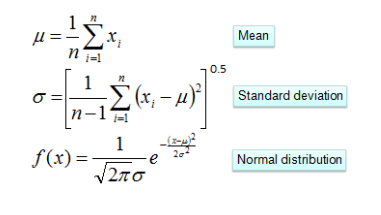

In [1]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-safeDiv(math.pow(x-mean,2), (2 * math.pow(stdev, 2))))
    final = safeDiv(1, (math.sqrt(2 * math.pi) * stdev)) * exponent
    return final

In [143]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [144]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [145]:
def getPredictions(summaries, test):
    predictions = []
    for i in range(len(test)):
        result = predict(summaries, test[i])
        predictions.append(result)
    return predictions

In [146]:
def getAccuracy(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct = 1
    accuracy = safeDiv(correct, float(len(test))) * 100.0
    return accuracy    

In [148]:
def main():
    dataset = loadCSV('Pgm 5 ConceptLearning.csv')
    #print(data)
    splitRatio = 0.99
    train, test = splitDataset(dataset, splitRatio)
    
    summaries = summarizeByClass(train)
    predictions = getPredictions(summaries, test)
    actual = []
    
    for i in range(len(test)):
        vector = test[i]
        actual.append(vector[-1])
    
    print("Actual : ", actual)
    print('Predicted : ',predictions)
    accuracy = getAccuracy(test, predictions)
    print("Accuracy : ", accuracy)
        
main()

Actual :  [5.0]
Predicted :  [5.0]
Accuracy :  100.0
